# Homework 4: Data Visualization

Name : Lasvitha Pregada ;
UB username : Lasvitha ;
UB Person Number : 50540960

# Part 1 : Generate Plots according to specifications

1. A scatter plot with a line

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("scatter_data.csv")
df.head()
df.dtypes
df.head()

,% x,y
0,95.954341,328.375777
1,60.162754,259.053445
2,52.754898,207.792989
3,88.034798,333.209632
4,80.271275,290.042475


In [4]:
check1=df["% x"].astype(str).str.startswith("%")
check2=df[" y "].astype(str).str.startswith("%")
new_df=df[check1]
new_df=df[check2]
new_df["% x"]=new_df["% x"].astype(str).str.replace("%","")
new_df[" y "]=new_df[" y "].astype(str).str.replace("%","")

new_df.head()

,% x,y


In [5]:
print(new_df.dtypes)

% x    object
 y     object
dtype: object


In [6]:
new_df["% x"]=pd.to_numeric(df["% x"],errors="coerce")
new_df[" y "]=pd.to_numeric(df[" y "],errors="coerce")
new_df.dtypes

% x    float64
 y     float64
dtype: object

In [7]:
new_df.head()

,% x,y
0,95.954341,328.375777
1,60.162754,259.053445
2,52.754898,207.792989
3,88.034798,333.209632
4,80.271275,290.042475


In [8]:
import matplotlib.pyplot as plt

In [9]:
x_min=new_df["% x"].min()
print(x_min)
x_max=new_df["% x"].max()
print(x_max)
y_min=new_df[" y "].min()
print(y_min)
y_max=new_df[" y "].max()
print(y_max)

50.095311
99.863385
117.316124
413.559362


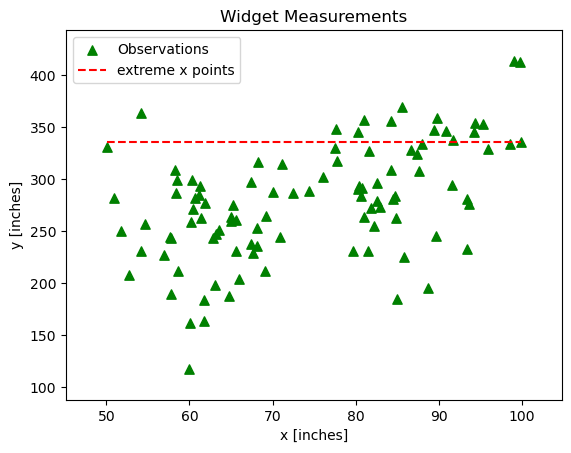

In [10]:
new_df.plot.scatter(x="% x", y=" y ",marker='^',color="green",s=45,label="Observations")
y_at_x_min = new_df[new_df['% x'] == x_min][' y '].iloc[0]
y_at_x_max = new_df[new_df['% x'] == x_max][' y '].iloc[0]
plt.hlines(y=y_at_x_max, xmin=x_min, xmax=x_max, colors='red', linestyles='--',label='extreme x points')

plt.legend(loc="upper left")
plt.xlabel("x [inches]")
plt.ylabel("y [inches]")
plt.title("Widget Measurements")

x_range = x_max - x_min
y_range = y_max - y_min

plt.xlim(x_min - 0.1*x_range, x_max + 0.1*x_range)
plt.ylim(y_min - 0.1*y_range, y_max + 0.1*y_range)
plt.show()

2. A Histogram

In [11]:
df2=pd.read_csv("student_grades.csv")
df2.head()

,% studentID,avgScore
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249


In [12]:
df2.dtypes

% studentID      int64
 avgScore      float64
dtype: object

In [13]:
check2_1=df2['% studentID'].astype(str).str.startswith("%")
check2_2=df2[" avgScore "].astype(str).str.startswith("%")
new_df2=df2[check2_1]
new_df2=df2[check2_2]
new_df2['% studentID']=new_df2['% studentID'].astype(str).str.replace("%","")
new_df2[" avgScore "]=new_df2[" avgScore "].astype(str).str.replace("%","")

new_df2.head()

,% studentID,avgScore


In [14]:
print(new_df2.dtypes)

% studentID    object
 avgScore      object
dtype: object


In [15]:
new_df2["% studentID"]=pd.to_numeric(df2["% studentID"],errors="coerce")
new_df2[" avgScore "]=pd.to_numeric(df2[" avgScore "],errors="coerce")
new_df2.dtypes

% studentID      int64
 avgScore      float64
dtype: object

In [16]:
new_df2.head()


,% studentID,avgScore
0,0,81.563259
1,1,67.426527
2,2,86.415197
3,3,80.387361
4,4,76.669249


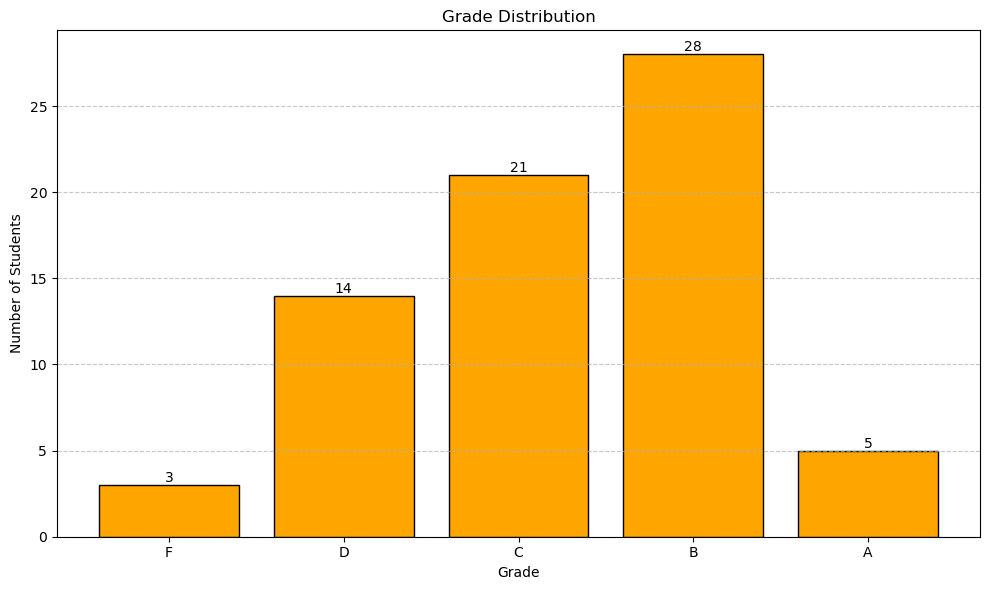

In [19]:
# Define the bins and labels for the histogram
bins = [0, 60, 70, 80, 90, 100]
BinLabels = ['F', 'D', 'C', 'B', 'A']

# Categorize 'avgScore' into letter grades
new_df2['letterGrade'] = pd.cut(new_df2[' avgScore '], bins=bins, labels=BinLabels, right=False, include_lowest=True)

# Count the number of students in each grade
gradeCount = new_df2['letterGrade'].value_counts().reindex(BinLabels, fill_value=0)

# Plot setup
plt.figure(figsize=(10, 6))  # Optional: Set the figure size
plt.bar(gradeCount.index, gradeCount.values, color='orange', edgecolor='black')

# Adding counts above bars
for i, count in enumerate(gradeCount.values):
    plt.text(i, count, str(count), fontsize=10, color='black', ha='center', va='bottom')

# Setting x-axis ticks to align with bars
plt.xticks(range(len(BinLabels)), BinLabels)

# Axis labels and plot title
plt.xlabel('Grade')
plt.ylabel('Number of Students')
plt.title('Grade Distribution')

# Adding a grid for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust plot layout
plt.tight_layout()
plt.show()

3.Barplots and Boxlots in the Same Figure

In [20]:
df3=pd.read_csv("solution_data.csv")
df3.head()

,% Problem,SolnMethod,Value
0,0,genetic algorithm,112.749860
1,0,simulated annealing,75.220917
2,0,tabu search,111.574225
3,0,optimal,166.170172
4,1,genetic algorithm,31.819762


In [21]:
df3.dtypes

% Problem       int64
SolnMethod     object
Value         float64
dtype: object

In [22]:
df3.columns

Index(['% Problem', 'SolnMethod', 'Value'], dtype='object')

In [23]:
check3_1=df3['% Problem'].astype(str).str.startswith("%")
check3_2=df3['SolnMethod'].str.startswith("%")
check3_3=df3["Value"].astype(str).str.startswith("%")
new_df3=df3[check3_1]
new_df3=df3[check3_2]
new_df3=df3[check3_3]
new_df3['% Problem']=new_df3['% Problem'].astype(str).str.replace("%","")
new_df3["Value"]=new_df3["Value"].astype(str).str.replace("%","")

new_df3.head()

,% Problem,SolnMethod,Value


In [24]:
new_df3["% Problem"]=pd.to_numeric(df3["% Problem"],errors="coerce")
new_df3["SolnMethod"]=df3["SolnMethod"]
new_df3["Value"]=pd.to_numeric(df3["Value"],errors="coerce")
new_df3.dtypes
new_df3.head()

,% Problem,SolnMethod,Value
0,0,genetic algorithm,112.749860
1,0,simulated annealing,75.220917
2,0,tabu search,111.574225
3,0,optimal,166.170172
4,1,genetic algorithm,31.819762


In [25]:
opt_ofv=new_df3.groupby("% Problem")["Value"].max().reset_index()
opt_ofv.rename(columns={'Value':'Opt_Ofv'},inplace=True)
new_df3=new_df3.merge(opt_ofv,on='% Problem',how='left')
new_df3.head()

,% Problem,SolnMethod,Value,Opt_Ofv
0,0,genetic algorithm,112.749860,166.170172
1,0,simulated annealing,75.220917,166.170172
2,0,tabu search,111.574225,166.170172
3,0,optimal,166.170172,166.170172
4,1,genetic algorithm,31.819762,48.634470


In [26]:
#considering highest values for each heristic as optimal OFV since it is a maximization problem.
values=((new_df3["Opt_Ofv"]-new_df3["Value"])/new_df3["Opt_Ofv"])*100
new_df3["Gap"]=values
avg_ofv=new_df3.groupby("SolnMethod")["Opt_Ofv"].mean().reset_index()
avg_ofv.rename(columns={'Opt_Ofv':'Avg_Ofv'},inplace=True)
new_df3=new_df3.merge(avg_ofv,on='SolnMethod',how='left')
new_df3.head()


,% Problem,SolnMethod,Value,Opt_Ofv,Gap,Avg_Ofv
0,0,genetic algorithm,112.749860,166.170172,32.147955,91.632316
1,0,simulated annealing,75.220917,166.170172,54.732600,91.632316
2,0,tabu search,111.574225,166.170172,32.855444,91.632316
3,0,optimal,166.170172,166.170172,0.000000,91.632316
4,1,genetic algorithm,31.819762,48.634470,34.573643,91.632316


In [27]:
grp=new_df3.groupby('SolnMethod')['Gap'].apply(list)
soln=grp.to_dict()
d1=pd.DataFrame(soln)
d1=d1.drop(columns=['optimal'])
d1.head()

,genetic algorithm,simulated annealing,tabu search
0,32.147955,54.732600,32.855444
1,34.573643,30.060710,15.651159
2,34.027413,56.900812,44.991033
3,32.186970,48.344138,24.379735
4,32.819833,56.088454,23.033096


C:\Users\lasvi\AppData\Local\Temp\ipykernel_17600\3206079607.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(heuristics)


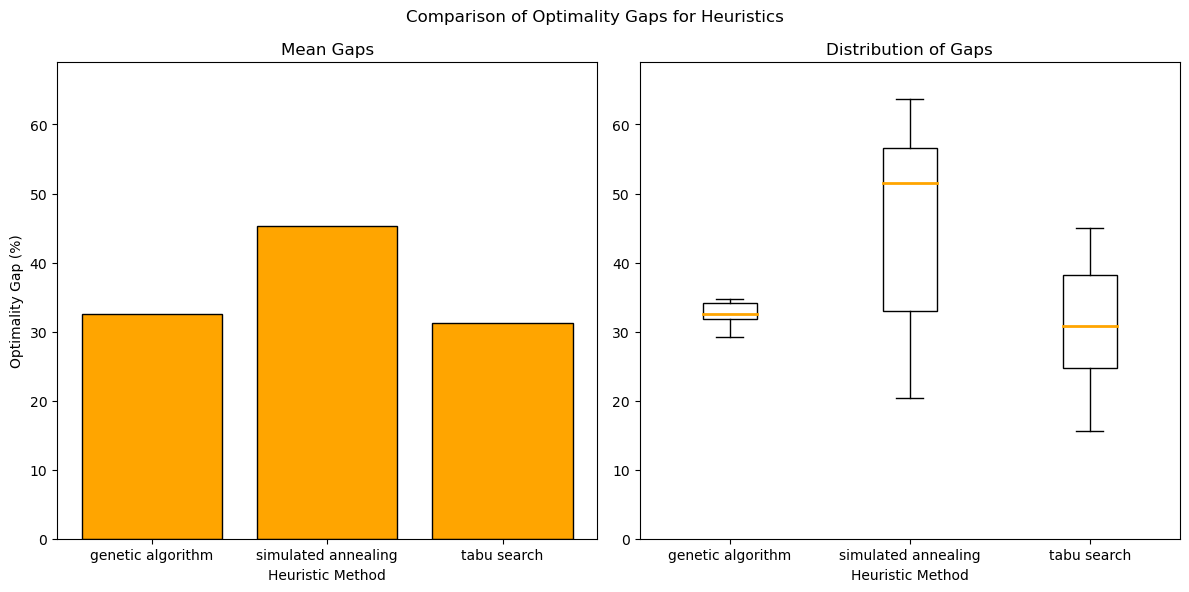

In [28]:
heuristics=["genetic algorithm","simulated annealing","tabu search"]

new_df3=new_df3[new_df3["SolnMethod"]!="optimal"]

fig,axs=plt.subplots(1,2,figsize=(12,6))
axs[0].bar(heuristics, new_df3.groupby("SolnMethod")["Gap"].mean(), color='orange', edgecolor='black')
axs[0].set_xticklabels(heuristics)
axs[0].set_xlabel("Heuristic Method")
axs[0].set_ylabel('Optimality Gap (%)')
axs[0].set_title('Mean Gaps')
axs[0].set_ylim(0,69)


box = axs[1].boxplot(d1, patch_artist=True, labels=heuristics)
axs[1].set_title('Distribution of Gaps')
axs[1].set_xlabel('Heuristic Method')
axs[1].set_ylim(0,69)
axs[0].set_ylim(axs[1].get_ylim())

# Coloring the median line of the boxplot orange
for median in box['medians']:
    median.set(color='orange', linewidth=2)

# Setting the background color for the boxplot
for patch in box['boxes']:
    patch.set_facecolor('white')

# Setting title for the whole figure
fig.suptitle('Comparison of Optimality Gaps for Heuristics')

plt.tight_layout()
plt.show()


# Part 2 - Explore New Plot types

In [29]:
data_viz=pd.read_csv("HR Employee Attrition.csv")
data_viz.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


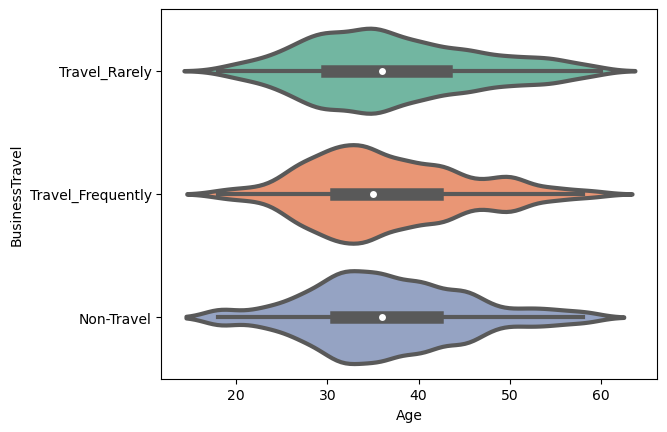

In [30]:
#violin plot
import seaborn as sns
sns.violinplot(x="Age",y="BusinessTravel",data=data_viz,palette="Set2", bw =.2, cut=2, linewidth=3)
plt.show()

Link for plot type : https://mode.com/blog/violin-plot-examples/

Link for Dataset : https://www.kaggle.com/datasets/whenamancodes/hr-employee-attrition